<a href="https://colab.research.google.com/github/deelilah/Univariate-Bivariate-Multivariate/blob/master/ip2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [0]:
#import pandas,numpy for analysis and seaborn,matplot lib visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#the inline is used to plot graphs without having to call plt.show()

LOADING THE DATASETS

In [3]:
load_df=pd.read_csv('Financial Dataset - 1.csv')
load_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


DATA INSIGHTS

In [4]:
load_df.shape
#out of the dataset,we have 23524 characteristics and 13 observations
#the observation have one dependent variable and 12 independent variable -physiochemical characteristics

(23524, 13)

In [5]:
load_df.columns.unique()
#column labels

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [6]:
load_df.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


SUMMARY STATISTICS

In [7]:
load_df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


TARGET VARIABLE

In [8]:
load_df.household_size.unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21., nan,  0., 18., 17., 20.])

In [9]:
load_df['Respondent Age'].unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        nan,  93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,
        94.,  87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

In [10]:
load_df.household_size.value_counts()

2.0     5132
1.0     3967
3.0     3535
4.0     3211
5.0     2727
6.0     2031
7.0     1383
8.0      741
9.0      356
10.0     192
12.0      66
11.0      66
0.0       36
13.0      25
15.0      11
14.0       9
16.0       4
18.0       1
20.0       1
21.0       1
17.0       1
Name: household_size, dtype: int64

REMOVE ANOMALIES

In [11]:
df1=load_df.columns.str.strip()
df1

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

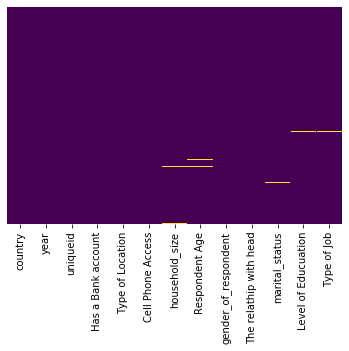

In [12]:
#missing values

sns.heatmap(load_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')





In [13]:
#check for outliers
Q1 = load_df.quantile(0.25)
Q3 = load_df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64


In [14]:

print((load_df < (Q1 - 1.5 * IQR)) |(load_df > (Q3 + 1.5 * IQR)))

       Cell Phone Access  Has a Bank account  ...  uniqueid   year
0                  False               False  ...     False  False
1                  False               False  ...     False  False
2                  False               False  ...     False  False
3                  False               False  ...     False  False
4                  False               False  ...     False  False
...                  ...                 ...  ...       ...    ...
23519              False               False  ...     False  False
23520              False               False  ...     False  False
23521              False               False  ...     False  False
23522              False               False  ...     False  False
23523              False               False  ...     False  False

[23524 rows x 13 columns]


In [15]:
#drop outliers


df2= load_df[~((load_df < (Q1 - 1.5 * IQR)) |(load_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df2.shape)

(22903, 13)


In [16]:
df2.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [17]:
df3=df2.dropna()
df3

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


In [18]:
df3.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [19]:
df4=df3.drop_duplicates()
df4

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


CHECK CORRELATION


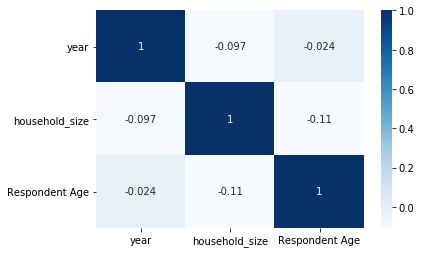

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(df4.corr(),cmap='Blues',annot=True)


#Dark shades represents positive correlation while lighter shades represents negative correlation.
#If you set annot=True, you'll get values by which features are correlated to each other in grid-cells

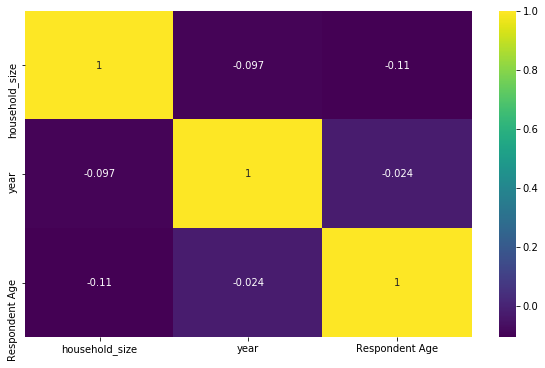

In [21]:
#Quality correlation matrix
k = 13 #number of variables for heatmap
cols = df4.corr().nlargest(k, 'household_size')['household_size'].index
cm = df4[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [80]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
country                 22725 non-null object
year                    22725 non-null int64
uniqueid                22725 non-null object
Has_a_bank_account      22725 non-null object
Location                22725 non-null object
Cell_phone_access       22725 non-null object
household_size          22725 non-null float64
Respondant_Age          22725 non-null category
gender_of_respondent    22725 non-null object
rel_head                22725 non-null object
marital_status          22725 non-null object
Level_of_Educuation     22725 non-null object
Type_of_job             22725 non-null object
dtypes: category(1), float64(1), int64(1), object(10)
memory usage: 2.3+ MB


Central Frequency


In [76]:
df6['household_size'].mean()


3.57984598459846

In [78]:
df6["household_size"].median()

3.0

In [79]:
df6["household_size"].mode()

0    2.0
dtype: float64

In [86]:
df6['Respondant_Age']=df6['Respondant_Age'].astype(float)

ValueError: ignored

UNIVARIATE 

In [22]:
df4.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [23]:
pd.DataFrame(df4.country.value_counts())

,country
Rwanda,8512
Tanzania,6424
Kenya,5868
Uganda,1921


In [24]:
pd.DataFrame(df4.marital_status.value_counts())

,marital_status
Married/Living together,10431
Single/Never Married,7748
Widowed,2509
Divorced/Seperated,2029
Dont know,8


In [25]:
df6=df4.rename(columns={'Has a Bank account':'Has_a_bank_account','Type of Location':'Location','Cell Phone Access':'Cell_phone_access','Respondent Age':'Respondant_Age','The relathip with head':'rel_head','Level of Educuation':'Level_of_Educuation','Type of Job':'Type_of_job'})
df6

,country,year,uniqueid,Has_a_bank_account,Location,Cell_phone_access,household_size,Respondant_Age,gender_of_respondent,rel_head,marital_status,Level_of_Educuation,Type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


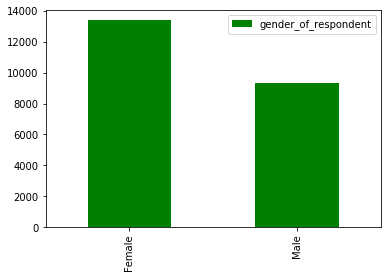

In [51]:
df7=pd.DataFrame(df6.gender_of_respondent	.value_counts())
df7.plot(kind='bar',color='green')




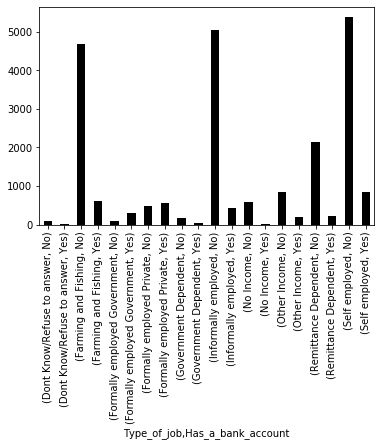

In [49]:
df8=df6.groupby (['Type_of_job','Has_a_bank_account'])['Has_a_bank_account'].count()
df8.plot(kind='bar',  color='black')

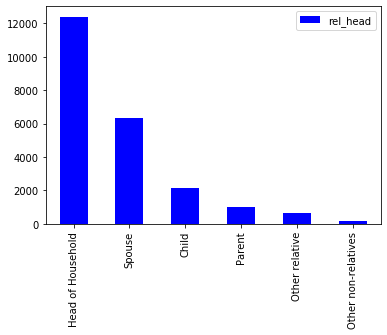

In [52]:
df9=pd.DataFrame(df6.rel_head .value_counts())
df9.plot(kind='bar',  color='blue')

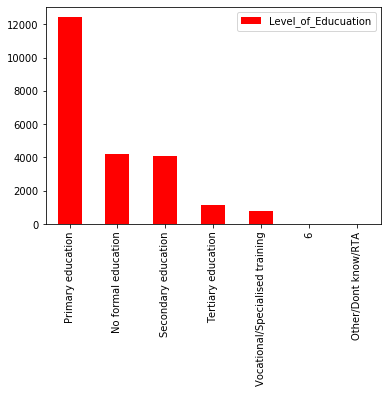

In [54]:
df10=pd.DataFrame(df6.Level_of_Educuation.value_counts())
df10.plot(kind='bar',color='red')

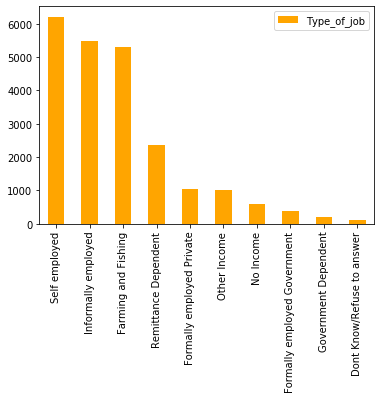

In [56]:
df11=pd.DataFrame(df6.Type_of_job.value_counts())
df11.plot(kind='bar',color='orange')

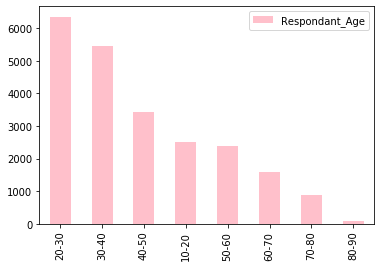

In [57]:
df12=pd.DataFrame(df6.Respondant_Age.value_counts())
df12.plot(kind='bar',color='pink')

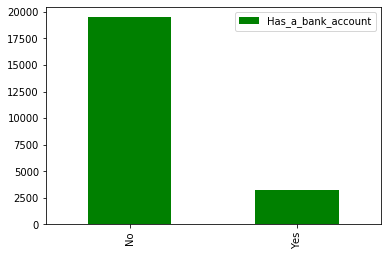

In [58]:
df14=pd.DataFrame(df6.Has_a_bank_account.value_counts())
df14.plot(kind='bar',color='green')

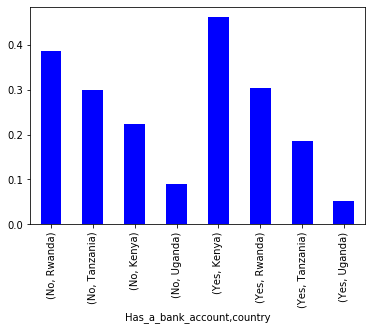

In [71]:
bybank=df6.groupby('Has_a_bank_account').country.value_counts(normalize=True)
bybank.plot(kind='bar',color='blue')


In [84]:
bygen=df6.groupby('gender_of_respondent').Has_a_bank_account.value_counts(normalize=True)
bygen

gender_of_respondent  Has_a_bank_account
Female                No                    0.891543
                      Yes                   0.108457
Male                  No                    0.808962
                      Yes                   0.191038
Name: Has_a_bank_account, dtype: float64

In [0]:
# df6['Respondant_Age']=pd.cut(df6.Respondant_Age,[10,20,30,40,50,60,70,80,90],labels=['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'])

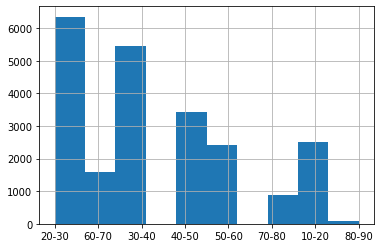

In [85]:
df6['Respondant_Age'].hist()

In [0]:
# byage=df6.groupby(['Respondant_Age','country']).Has_a_bank_account.value_counts(normalize=True)
# byage

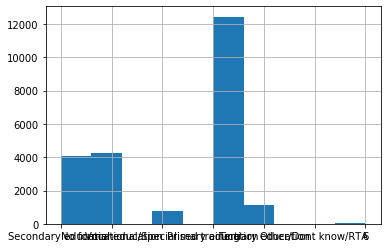

In [70]:
df6['Level_of_Educuation'].hist()